In [1]:
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [11]:
from matplotlib import pyplot as plt
import numpy as np

Set up

Step 1. Import relevant packages (most listed above).

Step 2. Load the images using sklearn’s load_digits().
Optional: Familiarize yourself with the dataset. For example, find out how many images and
labels there are, the size of each image, and display some of the images and their labels. The
following code will plot the first entry (digit 0):
plt.imshow(np.reshape(digits.data[0], (8, 8)), cmap='gray')
plt.title('Label: %i\n' % digits.target[0], fontsize=25)

Step 3. Split the images using sklearn’s train_test_split()with a test size anywhere
from 20% to 30% (inclusive)

In [15]:
digits = load_digits()

In [16]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Text(0.5, 1.0, 'Label: 0\n')

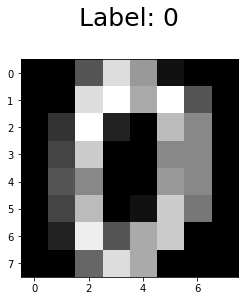

In [17]:
plt.imshow(np.reshape(digits.data[0], (8, 8)), cmap='gray')
plt.title('Label: %i\n' % digits.target[0], fontsize=25)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.25, random_state=0)

Classification
For each of the classifiers (KNeighborsClassifier, SGDClassifier, and
DecisionTreeClassifier) perform the following steps:

Step 4. Initialize the classifier model.

Step 5. Fit the model to the training data.

Step 6. Use the trained/fitted model to evaluate the test data.

In [69]:
# KNeighbors Classifier
from sklearn.model_selection import GridSearchCV
def knn():
    knn = KNeighborsClassifier()
#   Use grid search cv to find the best parameter here
    k_range = {"n_neighbors":[2,3,4,5,6,7,8,9,10]}
    gridKNN = GridSearchCV(knn,param_grid=k_range,cv=10)
    gridKNN.fit(X_train,y_train)
#     print('best score is:',str(gridKNN.best_score_))
#     print('best params are:',str(gridKNN.best_params_))
#   Fit gridkNN here
    y_predict=gridKNN.predict(X_test)
    # evaluation
    accuracy_score=metrics.accuracy_score(y_test, y_predict)
    print("KNN Accuracy: %0.3f"%accuracy_score,end='\t')
    # recall score
    recall_score=metrics.recall_score(y_test, y_predict, average='macro')
    print("Recall: %0.3f"%recall_score)
    # confusion matrix
    confusion_matrix=metrics.confusion_matrix(y_test, y_predict)
    return confusion_matrix

best score is: 0.9858872305140961

best params are: {'n_neighbors': 5}

In [73]:
# SGD Classifier
def sgd():
    sgd=SGDClassifier()
    sgd.fit(X_train,y_train)
    y_predict=sgd.predict(X_test)
    # accuracy score
    accuracy_score=metrics.accuracy_score(y_test, y_predict)
    print("SGD Accuracy: %0.3f"%accuracy_score,end='\t')
    # recall score
    recall_score=metrics.recall_score(y_test, y_predict, average='macro')
    print("Recall: %0.3f"%recall_score)
    confusion_matrix=metrics.confusion_matrix(y_test, y_predict)
    return confusion_matrix

In [74]:
# Decision Tree Classifier
def dt():
    dt=DecisionTreeClassifier(criterion="entropy")
    dt.fit(X_train,y_train)
    y_predict=dt.predict(X_test)
    # accuracy score
    accuracy_score=metrics.accuracy_score(y_test, y_predict)
    print("DT Accuracy: %0.3f"%accuracy_score,end='\t')
    # recall score
    recall_score=metrics.recall_score(y_test, y_predict, average='macro')
    print("Recall: %0.3f"%recall_score)
    confusion_matrix=metrics.confusion_matrix(y_test, y_predict)
    return confusion_matrix

Print the accuracy and recall of all three classifiers and the confusion matrix of the bestperforming classifier. Submit a screenshot for marking (see the example below for the case
of just a 6-class model). Also submit your code and include a brief justification for the chosen
parameter settings for KNN

In [75]:
# main
print("COMP9517 Week 5 Lab - z5225226")
print()
print("Test size = 0.25")
knn()
sgd()
dt()
# from the evaluation, it is obviously that KNeighnbor is the best-performing classifier. Print its m=confusion matrix here
matrix = knn()
print()
print("KNN Confusion Matrix:")
print(matrix)

COMP9517 Week 5 Lab - z5225226

Test size = 0.25
KNN Accuracy: 0.980	Recall: 0.980
SGD Accuracy: 0.951	Recall: 0.952
DT Accuracy: 0.822	Recall: 0.823
KNN Accuracy: 0.980	Recall: 0.980

KNN Confusion Matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  1  0  0  0  0]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  1  0  0  1  1 44  0]
 [ 0  0  0  0  0  1  0  0  0 46]]
